In [1]:
from googleapiclient.discovery import build
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Video IDs to use
#FwGeBW6OurM - John Hammond https://www.youtube.com/watch?v=FwGeBW6OurM
#uHGShqcAHlQ - Legend of Zelda https://www.youtube.com/watch?v=uHGShqcAHlQ
#eDaNejmf-1A - The Wrong Rock https://www.youtube.com/watch?v=eDaNejmf-1A - VERY POSITIVE
#YbJOTdZBX1g - YouTube Rewind 2018 https://www.youtube.com/watch?v=YbJOTdZBX1g - NEUTRAL (probably due to sarcasm)
#_GuOjXYl5ew - YouTube Rewind 2016 https://www.youtube.com/watch?v=_GuOjXYl5ew - POSITIVE

In [3]:
# General variables
api_key = '' #google api key
sentiment = SentimentIntensityAnalyzer()
video_id = "eDaNejmf-1A" #change this to the value after watch?v=       Example: https://www.youtube.com/watch?v=eDaNejmf-1A -> eDaNejmf-1A
html_comments = []
text_comments = []
sentiment_list = []

In [4]:
# Method that grabs video comments
def video_comments(video_id):
    # Creating YouTube resource object
    youtube = build('youtube', 'v3', developerKey=api_key)

    # Retrieve youtube video results
    video_response=youtube.commentThreads().list(part='snippet', videoId=video_id, maxResults=100, order='relevance').execute()

    # Iterate video response
    items = video_response['items']

    for i in items:
        item_info = i['snippet']
        topLevelComment = item_info['topLevelComment']
        comment_info = topLevelComment['snippet']

        text = comment_info['textDisplay']
        if text in html_comments:
            continue
        else:
            #foreign lang handling goes here
            html_comments.append(text)

# Call function
video_comments(video_id)

In [5]:
# Take html and use Beautiful Soup to make it text
for comment in html_comments:
    soup = BeautifulSoup(comment)
    text_comments.append(soup.get_text())

C:\Users\ethan\PycharmProjects\EET4501\venv\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [6]:
# Takes the plaintext list of comments and does analysis on those
for comment in text_comments:
    vs = sentiment.polarity_scores(comment)
    sentiment_list.append(vs)
    #print("{:-<65} {}".format(comment, str(vs)))

In [7]:
# Determining average sentiment and making a compound sentiment list for graphing
total_sentiment = 0
compound_sentiment = []
for i in sentiment_list:
    compound_sentiment.append(i['compound'])
    total_sentiment = total_sentiment + i['compound']

avg_sentiment = total_sentiment/len(sentiment_list)
print(f'Average compound sentiment is {avg_sentiment}')

Average compound sentiment is 0.7175949999999998


In [8]:
# Prints the overall sentiment based on the thresholds provided in the VADER docs
if avg_sentiment >= 0.05:
    print('Overall sentiment is POSITIVE')
elif avg_sentiment <= -0.05:
    print('Overall sentiment is NEGATIVE')
else:
    print('Overall sentiment is NEUTRAL')

Overall sentiment is POSITIVE


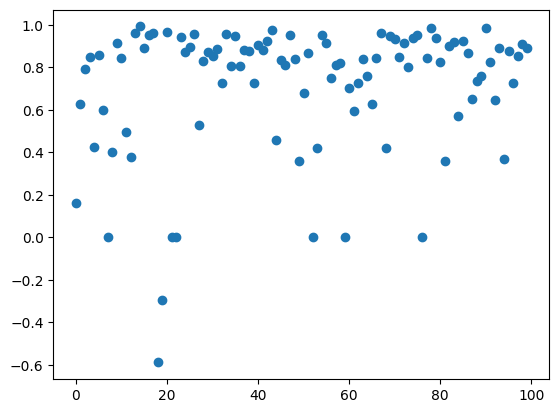

In [9]:
# Sort of heatmap to visualize the distribution of the compound sentiment values
x = np.arange(len(compound_sentiment))
y = compound_sentiment

plt.scatter(x, y)
plt.show()

In [10]:
# NOTES
# issue with "unit cost" which limits number of queries

# TODO

In [11]:
#references
#https://github.com/cjhutto/vaderSentiment/blob/master/README.rst#code-examples
#https://developers.google.com/youtube/v3/docs/comments
#https://beautiful-soup-4.readthedocs.io/en/latest/
#https://matplotlib.org/stable/plot_types/index.html
#https://www.unite.ai/10-best-python-libraries-for-sentiment-analysis/